<a href="https://colab.research.google.com/github/paizaga/data_analytics_2/blob/main/Python%5CUnit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [9]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [10]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [12]:
new_dataFrame = df[['sex','salary']]

In [13]:
new_dataFrame.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


Finding the Median salary for all males

In [16]:
male_salary_df = new_dataFrame[(new_dataFrame['sex'] == 'Male')]
male_salary_df['salary'].median()

108043.0

Finding the Median salary for all females

In [17]:
female_salary_df = new_dataFrame[(new_dataFrame['sex'] == 'Female')]
female_salary_df['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [19]:
male_mean_salary = male_salary_df['salary'].mean()
female_mean_salary = female_salary_df['salary'].mean()

In [21]:
# The difference between mean salaries of male and female
difference = male_mean_salary - female_mean_salary
print("The difference between mean male salaries and female mean salaries is: \n",difference)

The difference between mean male salaries and female mean salaries is: 
 14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [26]:
experience_df = df[df['yrs.service'] >= 20]
experience_mean = experience_df['salary'].mean()
print (experience_mean)

122520.65605095541


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [31]:
less_experience_df = df[df['yrs.service'] < 20]
less_experience_mean = less_experience_df['salary'].mean()
print (less_experience_mean)

107940.50416666667


People who have salary of greater than or equal to 200,000

In [30]:
large_compensation = df[df['salary'] >= 200000]
large_compensation

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


There are only three people in this data set that have a total compensation/salary at or above $200,000. All of these individuals were men, professors, and had at least 29 years since their phD.

Two professors, on lines 43 and 364 spent their entire career in their discipline at their workplace which would make sense for their high level of compensation. However, one professor on line 249 had a relatively comparable time since his being awarded his phD, but had only 7 years of service at his current workplace.




# Rename values, subset columns, etc

In [33]:
df.rename(columns= {"rank": "Level"})

,Unnamed: 0,Level,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

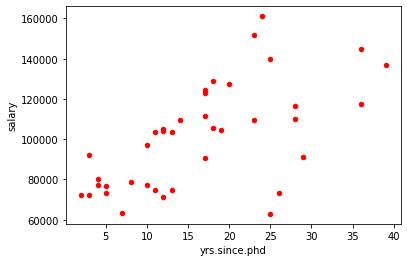

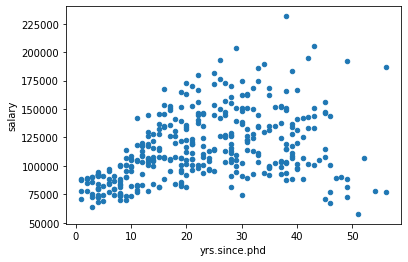

In [59]:
female_df = df[df['sex'] == 'Female']
female_df.plot(x = 'yrs.since.phd', y = 'salary', kind = 'scatter', color = 'red')
male_df = df[df['sex'] == 'Male']
male_df.plot(x = 'yrs.since.phd', y = 'salary', kind = 'scatter')


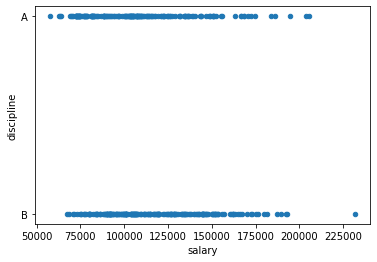

In [58]:
df.plot(x = 'salary', y = 'discipline', kind = 'scatter')

Your observations from the visuals:
There is a significant difference between male and female salaries. The highest female salary tops out around $160,000 with nearly 25 years of service, and male salaries can top out over $225,000 with around 35 years of service. 

The salary range between male and females start out nearly the same, but diverge quickly after 10 years of service.

Additionally, teachers who are in Profession 'B' generally have a lower top salary than those in profession 'A'. However, one professor in 'B' is an outlier, with a salary of over $225,000.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Generally, males earn more than females. The mean difference between male and female salaries is $14,088. 

Generally, people with more years of experience earn more than those with less experience. 

However, surprisingly I found that that correlation is not true after 24 years for females, and after 35 years for males. In either group, the professors with more experience than that earned less money. In some cases, the difference was significant.

I also discovered that professors in profession 'B' are in a tighter salary range than those in profession 'A', excluding the one outlier who earned signficiantly more than everyone else in either profession.


